In [192]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

In [193]:
df = pd.read_csv('./final_dfs/df_final_with_clusters.csv') 
df

,Unnamed: 0,data_index,cluster,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,0,0,2,"Flensburg, Stadt",1001,1,92,500,35,240,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1,1,0,"Kiel, Landeshauptstadt",1002,1,92,460,37,268,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,2,2,0,"Lübeck, Hansestadt",1003,1,90,532,37,297,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,3,3,2,"Neumünster, Stadt",1004,1,85,588,37,316,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,4,4,2,Dithmarschen,1051,1,51,1864,35,448,...,2914,46945,23486,12.8,11806,11575,17816,9873,7834,7676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,396,396,2,Saalfeld-Rudolstadt,16073,16,62,1423,37,341,...,2466,39242,20959,8.3,12237,13267,19810,5653,3271,2547
397,397,397,2,Saale-Holzland-Kreis,16074,16,54,1677,38,343,...,2288,42956,20631,7.6,5131,9216,14445,5254,3446,2379
398,398,398,2,Saale-Orla-Kreis,16075,16,54,1686,35,449,...,2253,40511,20610,7.6,7388,7994,17082,4532,2501,1632
399,399,399,2,Greiz,16076,16,55,1654,38,608,...,2233,40784,21275,7.8,11098,10354,18760,5324,3370,2287


In [194]:
df = df.query("cluster != 1")

In [195]:
df.query("cluster == 0")

,Unnamed: 0,data_index,cluster,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
1,1,1,0,"Kiel, Landeshauptstadt",1002,1,92,460,37,268,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,2,2,0,"Lübeck, Hansestadt",1003,1,90,532,37,297,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
16,16,16,0,Braunschweig,3101,3,94,449,55,388,...,3438,39986,22975,9.6,21381,33669,37071,20331,14641,15535
26,26,26,0,Hannover,3241,3,86,639,49,440,...,3387,42502,22017,11.5,86658,118256,154892,91374,69094,79207
61,61,61,0,Bremen,4011,4,95,440,61,371,...,3445,41817,22315,12.6,59175,78675,63950,37466,29350,35163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,356,356,0,Dresden,14612,14,93,439,68,305,...,2987,36642,19950,9.4,60046,87566,62994,39471,29437,22394
361,361,361,0,"Leipzig, Stadt",14713,14,96,376,69,329,...,2807,33038,18566,13.2,85779,91184,70440,38443,25880,18564
365,365,365,0,Halle (Saale),15002,15,96,392,69,437,...,2806,32326,18229,16.4,26884,51893,34489,12134,5594,3914
366,366,366,0,Magdeburg,15003,15,95,426,66,404,...,2760,34711,19247,14.7,29353,42593,39638,8905,5771,6075


In [196]:
di = {0:"bigger_cities", 2:"smaller_cities"}
df = df.replace({"cluster": di})
df

,Unnamed: 0,data_index,cluster,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,0,0,smaller_cities,"Flensburg, Stadt",1001,1,92,500,35,240,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1,1,bigger_cities,"Kiel, Landeshauptstadt",1002,1,92,460,37,268,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,2,2,bigger_cities,"Lübeck, Hansestadt",1003,1,90,532,37,297,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,3,3,smaller_cities,"Neumünster, Stadt",1004,1,85,588,37,316,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,4,4,smaller_cities,Dithmarschen,1051,1,51,1864,35,448,...,2914,46945,23486,12.8,11806,11575,17816,9873,7834,7676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,396,396,smaller_cities,Saalfeld-Rudolstadt,16073,16,62,1423,37,341,...,2466,39242,20959,8.3,12237,13267,19810,5653,3271,2547
397,397,397,smaller_cities,Saale-Holzland-Kreis,16074,16,54,1677,38,343,...,2288,42956,20631,7.6,5131,9216,14445,5254,3446,2379
398,398,398,smaller_cities,Saale-Orla-Kreis,16075,16,54,1686,35,449,...,2253,40511,20610,7.6,7388,7994,17082,4532,2501,1632
399,399,399,smaller_cities,Greiz,16076,16,55,1654,38,608,...,2233,40784,21275,7.8,11098,10354,18760,5324,3370,2287


<AxesSubplot:xlabel='supermarkets_population', ylabel='Density'>

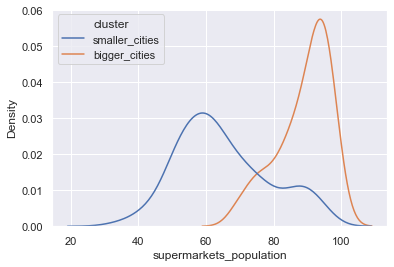

In [197]:
sns.kdeplot(data=df, x="supermarkets_population", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='median_income', ylabel='Density'>

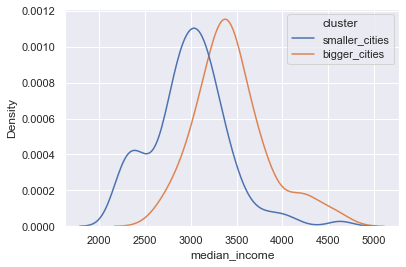

In [198]:
sns.kdeplot(data=df, x="median_income", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='household_in_income_calss_6', ylabel='Density'>

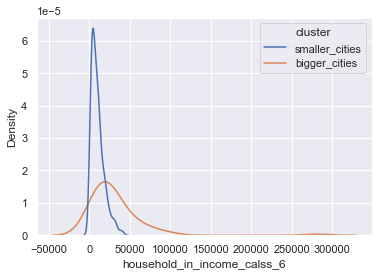

In [199]:
sns.kdeplot(data=df, x="household_in_income_calss_6", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='household_with_kids', ylabel='Density'>

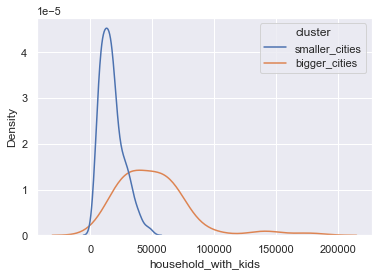

In [200]:
sns.kdeplot(data=df, x="household_with_kids", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='car_density', ylabel='Density'>

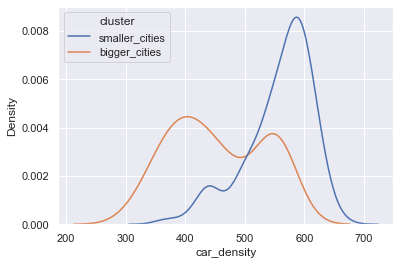

In [201]:
sns.kdeplot(data=df, x="car_density", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='Proportion_of_in_commuters', ylabel='Density'>

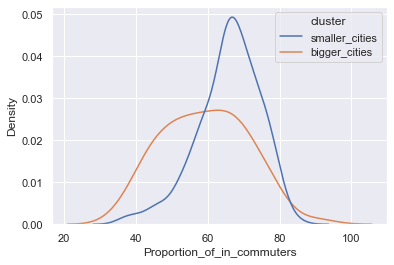

In [202]:
sns.kdeplot(data=df, x="Proportion_of_in_commuters", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='no_of_births_in_2018', ylabel='Density'>

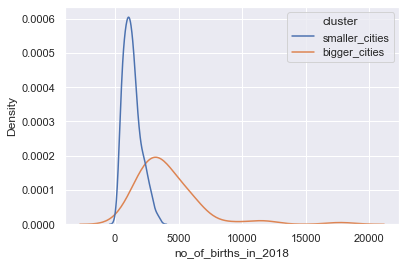

In [203]:
sns.kdeplot(data=df, x="no_of_births_in_2018", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='no_of_foreigners_2018', ylabel='Density'>

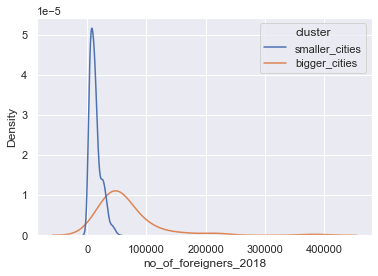

In [204]:
sns.kdeplot(data=df, x="no_of_foreigners_2018", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='2019_population', ylabel='Density'>

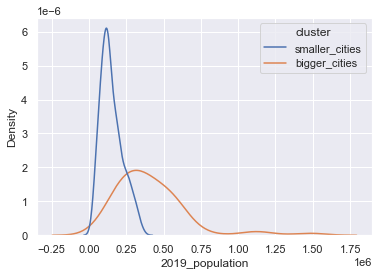

In [205]:
sns.kdeplot(data=df, x="2019_population", hue="cluster",  common_norm=False)

<AxesSubplot:xlabel='number_of_guests', ylabel='Density'>

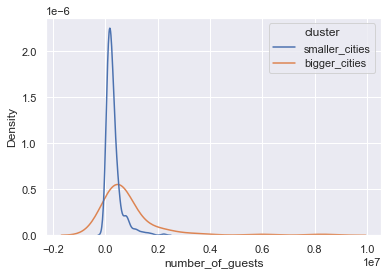

In [206]:
sns.kdeplot(data=df, x="number_of_guests", hue="cluster", common_norm=False)

<AxesSubplot:xlabel='number_of_students', ylabel='Density'>

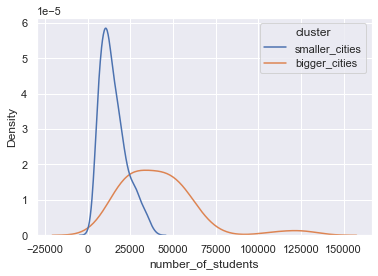

In [207]:
sns.kdeplot(data=df, x="number_of_students", hue="cluster", common_norm=False)

In [208]:
print(', '.join(df.columns.to_numpy()))

Unnamed: 0, data_index, cluster, kreis, ags5, ags2, supermarkets_population, supermarkets_average_distance, public_transport_availability, average_distance_bus_stop, average_distance_train_station, average_distance_public_transport, Unnamed:_0, number_of_students, number_of_hospitals, number_of_hospital_beds, number_of_hospital_beds_adj, hospital_patiants, households_of_1_person, households_of_2_person, households_of_3_person, households_of_4_person, households_of_5_person_or_more, household_with_kids, household_with_kids_under_3, household_with_kids_over_3_under_6, household_with_kids_over_6_under_10, household_with_kids_over_10_under_15, household_with_kids_over_15_under_18, household_with_double_income_no_kids, car_density, no_of_paths_per_person_and_day, kilometers_per_person_and_day, _percentage_out_of_home, share_of_journeys_on_foot, share_of_journeys_on_bike, proportion_of_motorised_vehicle_passenger, share_of_motorised_vehicle_driver, share_of_public_transport_, public_transpor